In [92]:
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import odeint

In [93]:
def f(a):
    n=4
    return (1/(1+a**n))
def Gly(y, t, params): 
    J0, k1,k2,k_g1,k_g2,k_p1,k_p2,k4,k5,k6,k7,k8,k9,kappa,phi,A,N= params 
    S1,S2,S3,S4,S5,S6,S6_ex,A3,N2= y 
    dydt= np.empty(len(y)) 
    v1= k1*S1*A3*f(A3)
    v2= k2*S2
    v3= (k_g1*k_p1*S3*(N-N2)*(A-A3)-k_g2*k_p2*S4*A3*N2)/(k_g2*N2+k_p1*(A-A3))
    v4= k4*S4*(A-A3)
    v5= k5*S5
    v6= k6*S6*N2
    v7= k7*A3
    v8= k8*S3*N2
    v9= k9*S6_ex
    dydt[0]= J0-v1
    dydt[1]= v1-v2
    dydt[2]= 2*v2-v3-v8
    dydt[3]= v3-v4
    dydt[4]= v4-v5
    dydt[5]= v5-v6-kappa*(S6-S6_ex)
    dydt[6]= phi*kappa*(S6-S6_ex)-v9
    dydt[7]= -2*v1+v3+v4-v7
    dydt[8]= v3 -v6 -v8
    return dydt 
def solveGly(S1,S2,S3,S4,S5,S6,S6_ex,A3,N2,k9,t2): #t2< 3.2
    t1= np.linspace(0,t2,200) #cannot run any longer. otherwise the program will collapse

    yi= np.array([S1,S2,S3,S4,S5,S6,S6_ex,A3,N2]) 

    params= np.array([50,550,9.8,323.8,57823.1,76411.1,23.7,80,9.7,2000,28,85.7,k9,375,0.1,4,1]) 

    y1= odeint(Gly, yi, t1, args= (params,))
    return y1

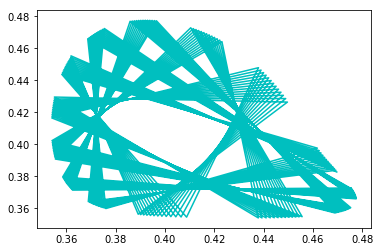

In [94]:
x=np.linspace(0,0.5,200)
x2=np.linspace(0.3,0.8,200)
cell1=solveGly(0.64359951,  5.64399633,  0.5393    ,  0.56646   ,  8.3504    ,
         0.09746995,  0.08193084,  1.37895677,  0.3869099,80,10)
cell2=solveGly(1.58066029,  4.63141298,  0.5393    ,  0.56646   ,  8.3504    ,
         0.10628539,  0.08475373,  2.69596689,  0.34356362,80,10)
plt.figure()
plt.plot(cell1[:,8][20:],cell2[:,8][20:],'c')
plt.show()

In [52]:
def sync(repetition):
    i=0
    while i < repetition:
        if i ==0:
            init1=[0.64359951,  5.64399633,  0.5393    ,  0.56646   ,  8.3504    ,
             0.09746995,  0.08193084,  1.37895677,  0.3869099,80,0,0.1]
            init2=[1.58066029,  4.63141298,  0.5393    ,  0.56646   ,  8.3504    ,
             0.10628539,  0.08475373,  2.69596689,  0.34356362,80,0,0.1]
        else:
            init1=[inter1[0],inter1[1],inter1[2],inter1[3],inter1[4],inter1[5],(inter1[6]+inter2[6])/2,inter1[7],inter1[8],80,0.5]
            init2=[inter2[0],inter2[1],inter2[2],inter2[3],inter2[4],inter2[5],(inter1[6]+inter2[6])/2,inter2[7],inter1[8],80,0.5]
        c1= solveGly(init1[0],init1[1],init1[2],init1[3],init1[4],init1[5],init1[6],init1[7],init1[8],init1[9],init1[10])
        c2= solveGly(init2[0],init2[1],init2[2],init2[3],init2[4],init2[5],init2[6],init2[7],init2[8],init2[9],init2[10])
        inter1= c1[-1]
        inter2= c2[-1]
        i+=1
    return (c1,c2)

(inter1[8]+inter2[8])/2 allows both cells to communicate their extracellular acetaldehyde every 0.5 min

In [90]:
#Modeling adding NADH and changing activity of ADH
def f(a):
    n=4
    return (1/(1+a**n))
def g(b):
    return (1/(1+b**2))
def Gly2(y, t, params): 
    J0, k1,k2,k_g1,k_g2,k_p1,k_p2,k4,k5,k6,k7,k8,k9,kappa,phi,A,N,k10= params 
    S1,S2,S3,S4,S5,S6,S6_ex,A3,N2= y 
    dydt= np.empty(len(y)) 
    v1= k1*S1*A3*f(A3)
    v2= k2*S2
    v3= (k_g1*k_p1*S3*(N-N2)*(A-A3)-k_g2*k_p2*S4*A3*N2)/(k_g2*N2+k_p1*(A-A3))
    v4= k4*S4*(A-A3)
    v5= k5*S5
    v6= k6*S6*N2
    v7= k7*A3
    v8= k8*S3*N2
    v9= k9*S6_ex
    dydt[0]= J0-v1
    dydt[1]= v1-v2
    dydt[2]= 2*v2-v3-v8
    dydt[3]= v3-v4
    dydt[4]= v4-v5
    dydt[5]= v5-v6-kappa*(S6-S6_ex)
    dydt[6]= phi*kappa*(S6-S6_ex)-v9
    dydt[7]= -2*v1+v3+v4-v7
    dydt[8]= v3 -v6 -v8 +k10 #k10 is the constant influx of NADH
    return dydt 
def solveGly2(S1,S2,S3,S4,S5,S6,S6_ex,A3,N2,k9,k10,t2): #t2< 3.2
    t1= np.linspace(0,t2,200) #cannot run any longer. otherwise the program will collapse

    yi= np.array([S1,S2,S3,S4,S5,S6,S6_ex,A3,N2]) 

    params= np.array([50,550,9.8,323.8,57823.1,76411.1,23.7,80,9.7,2000,28,85.7,k9,375,0.1,4,1,k10]) 

    y1= odeint(Gly2, yi, t1, args= (params,))
    return y1

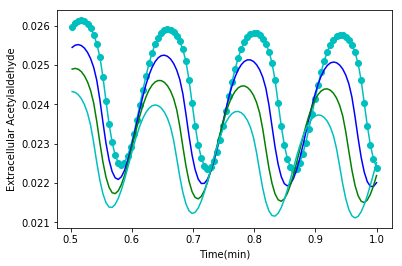

In [95]:
x=np.linspace(0,1,200)
plt.figure()
plt.plot(x[100:],solveGly(2,2,6,1,9,1,1,1,0.3,80,1)[:,6][100:],'co')
plt.plot(x[100:],solveGly2(2,2,6,1,9,1,1,1,0.3,80,0,1)[:,6][100:],'c')
plt.plot(x[100:],solveGly2(2,2,6,1,9,1,1,1,0.3,80,1,1)[:,6][100:],'b')
plt.plot(x[100:],solveGly2(2,2,6,1,9,1,1,1,0.3,80,2,1)[:,6][100:],'g')
plt.plot(x[100:],solveGly2(2,2,6,1,9,1,1,1,0.3,80,3,1)[:,6][100:],'c')
plt.xlabel('Time(min)')
plt.ylabel('Extracellular Acetylaldehyde')
plt.show()

In [105]:
mean_S6=[]
max_S6=[]
min_S6=[]
for k10 in np.linspace(0,10):
    mean_S6+=[np.mean(solveGly2(2,2,6,1,9,1,1,1,0.3,80,k10,1)[:,5][100:])]
    max_S6+=[np.max(solveGly2(2,2,6,1,9,1,1,1,0.3,80,k10,1)[:,5][100:])]
    min_S6+=[np.min(solveGly2(2,2,6,1,9,1,1,1,0.3,80,k10,1)[:,5][100:])]

In [25]:
np.mean(solveGly(2,2,6,1,9,1,1,1,0.3,80,1)[:,5][100:])

0.076361771103530568

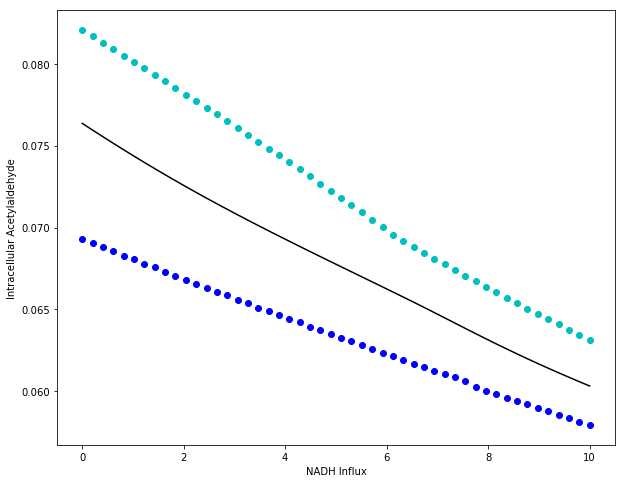

In [115]:
k10 = np.linspace(0,10)
plt.figure(figsize=(10,8))
plt.plot(k10,mean_S6,'k')
plt.plot(k10,max_S6,'co')
plt.plot(k10,min_S6,'bo')
plt.xlabel('NADH Influx')
plt.ylabel('Intracellular Acetylaldehyde')
plt.show()

In [102]:
mean_S6ex=[]
max_S6ex=[]
min_S6ex=[]
for k10 in np.linspace(0,10):
    mean_S6ex+=[np.mean(solveGly2(2,2,6,1,9,1,1,1,0.3,80,k10,1)[:,6][100:])]
    max_S6ex+=[np.max(solveGly2(2,2,6,1,9,1,1,1,0.3,80,k10,1)[:,6][100:])]
    min_S6ex+=[np.min(solveGly2(2,2,6,1,9,1,1,1,0.3,80,k10,1)[:,6][100:])]

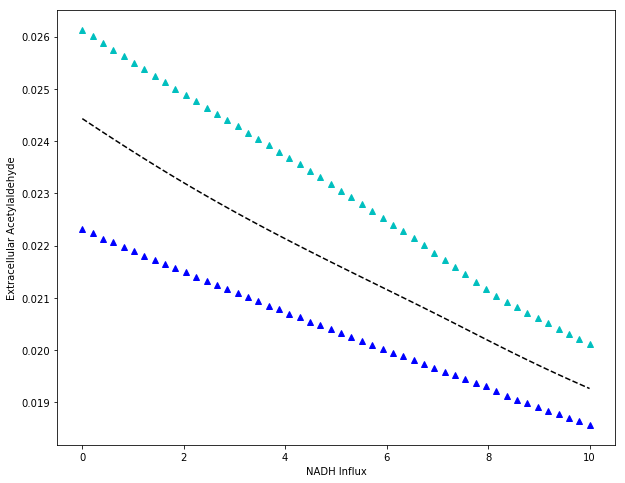

In [114]:
k10 = np.linspace(0,10)
plt.figure(figsize=(10,8))
plt.plot(k10,mean_S6ex,'k--')
plt.plot(k10,max_S6ex,'c^')
plt.plot(k10,min_S6ex,'b^')
plt.xlabel('NADH Influx')
plt.ylabel('Extracellular Acetylaldehyde')
plt.show()

In [97]:
#Modeling adding NADH and changing activity of ADH
def f(a):
    n=4
    return (1/(1+a**n))
def g(b):
    return (1/(1+b**2))
def Gly3(y, t, params): 
    J0, k1,k2,k_g1,k_g2,k_p1,k_p2,k4,k5,k6,k7,k8,k9,kappa,phi,A,N= params 
    S1,S2,S3,S4,S5,S6,S6_ex,A3,N2= y 
    dydt= np.empty(len(y)) 
    v1= k1*S1*A3*f(A3)
    v2= k2*S2
    v3= (k_g1*k_p1*S3*(N-N2)*(A-A3)-k_g2*k_p2*S4*A3*N2)/(k_g2*N2+k_p1*(A-A3))
    v4= k4*S4*(A-A3)
    v5= k5*S5
    v6= k6*S6*N2
    v7= k7*A3
    v8= k8*S3*N2
    v9= k9*S6_ex
    dydt[0]= J0-v1
    dydt[1]= v1-v2
    dydt[2]= 2*v2-v3-v8
    dydt[3]= v3-v4
    dydt[4]= v4-v5
    dydt[5]= v5-v6-kappa*(S6-S6_ex)
    dydt[6]= phi*kappa*(S6-S6_ex)-v9
    dydt[7]= -2*v1+v3+v4-v7
    dydt[8]= v3 -v6 -v8 #k10 is the constant influx of NADH
    return dydt 
def solveGly3(S1,S2,S3,S4,S5,S6,S6_ex,A3,N2,k9,k6,t2): #t2< 3.2
    t1= np.linspace(0,t2,200) #cannot run any longer. otherwise the program will collapse

    yi= np.array([S1,S2,S3,S4,S5,S6,S6_ex,A3,N2]) 

    params= np.array([50,550,9.8,323.8,57823.1,76411.1,23.7,80,9.7,k6,28,85.7,k9,375,0.1,4,1]) 

    y1= odeint(Gly3, yi, t1, args= (params,))
    return y1

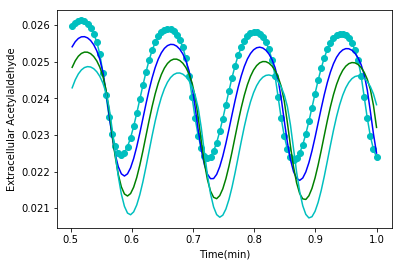

In [100]:
x=np.linspace(0,1,200)
plt.figure()
plt.plot(x[100:],solveGly(2,2,6,1,9,1,1,1,0.3,80,1)[:,6][100:],'co')
plt.plot(x[100:],solveGly3(2,2,6,1,9,1,1,1,0.3,80,2000,1)[:,6][100:],'c')
plt.plot(x[100:],solveGly3(2,2,6,1,9,1,1,1,0.3,80,2100,1)[:,6][100:],'b')
plt.plot(x[100:],solveGly3(2,2,6,1,9,1,1,1,0.3,80,2200,1)[:,6][100:],'g')
plt.plot(x[100:],solveGly3(2,2,6,1,9,1,1,1,0.3,80,2300,1)[:,6][100:],'c')
plt.xlabel('Time(min)')
plt.ylabel('Extracellular Acetylaldehyde')
plt.show()

In [107]:
mean_sS6=[]
max_sS6=[]
min_sS6=[]
for k6 in np.linspace(2000,10000):
    mean_sS6+=[np.mean(solveGly3(2,2,6,1,9,1,1,1,0.3,80,k6,1)[:,5][100:])]
    max_sS6+=[np.max(solveGly3(2,2,6,1,9,1,1,1,0.3,80,k6,1)[:,5][100:])]
    min_sS6+=[np.min(solveGly3(2,2,6,1,9,1,1,1,0.3,80,k6,1)[:,5][100:])]

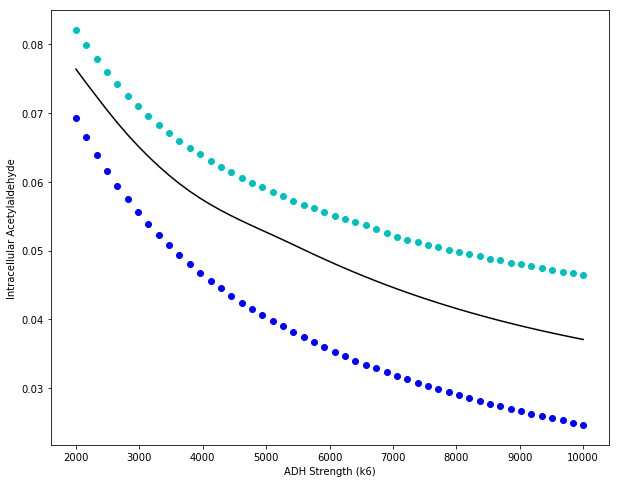

In [112]:
k6= np.linspace(2000,10000)
plt.figure(figsize=(10,8))
plt.plot(k6,mean_sS6,'k')
plt.plot(k6,max_sS6,'co')
plt.plot(k6,min_sS6,'bo')
plt.xlabel('ADH Strength (k6)')
plt.ylabel('Intracellular Acetylaldehyde')
plt.show()

In [109]:
mean_sS6ex=[]
max_sS6ex=[]
min_sS6ex=[]
for k6 in np.linspace(2000,10000):
    mean_sS6ex+=[np.mean(solveGly3(2,2,6,1,9,1,1,1,0.3,80,k6,1)[:,6][100:])]
    max_sS6ex+=[np.max(solveGly3(2,2,6,1,9,1,1,1,0.3,80,k6,1)[:,6][100:])]
    min_sS6ex+=[np.min(solveGly3(2,2,6,1,9,1,1,1,0.3,80,k6,1)[:,6][100:])]

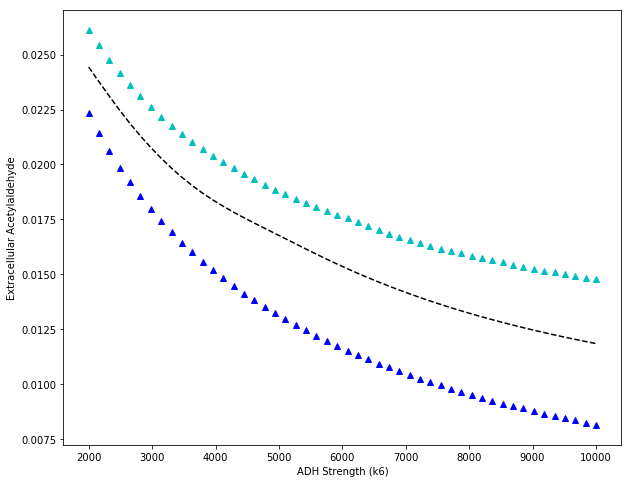

In [113]:
k6= np.linspace(2000,10000)
plt.figure(figsize=(10,8))
plt.plot(k6,mean_sS6ex,'k--')
plt.plot(k6,max_sS6ex,'c^')
plt.plot(k6,min_sS6ex,'b^')
plt.xlabel('ADH Strength (k6)')
plt.ylabel('Extracellular Acetylaldehyde')
plt.show()

In [51]:
solveGly2(2,2,6,1,9,1,1,1,0.3,80,1,1)[190:]

array([[ 1.25935798,  5.10558782,  0.48038965,  0.51430139,  8.22906073,
         0.0753922 ,  0.02451654,  1.51470225,  0.40472535],
       [ 0.52118744,  5.82380288,  0.51312715,  0.37661856,  8.38308165,
         0.07352772,  0.02417818,  0.39535161,  0.43012632],
       [ 0.33949465,  5.96578799,  0.55185141,  0.32178517,  8.46843112,
         0.07134697,  0.0236873 ,  0.41332167,  0.45319106],
       [ 0.2385755 ,  6.02257213,  0.57992381,  0.31991056,  8.50656154,
         0.06967722,  0.02314017,  0.54429149,  0.46879486],
       [ 0.18173977,  6.03361955,  0.59936111,  0.33327809,  8.53205255,
         0.06864592,  0.02265005,  0.73380516,  0.4782559 ],
       [ 0.17013509,  5.99999497,  0.61159304,  0.35429028,  8.54992797,
         0.06814723,  0.02227475,  0.9777217 ,  0.48267568],
       [ 0.2021586 ,  5.9254344 ,  0.61764845,  0.38208319,  8.55869539,
         0.06807371,  0.02203013,  1.26141437,  0.48279222],
       [ 0.27039134,  5.81916209,  0.61870707,  0.4166651 ,  8

In [39]:
#Modeling adding NADH and changing activity of ADH: add NADH
def f(a):
    n=4
    return (1/(1+a**n))
def g(b):
    return (1/(1+b**2))
def Glys2(y, t, params): 
    J0, k1,k2,k_g1,k_g2,k_p1,k_p2,k4,k5,k6,k7,k8,k9,kappa,phi,A,N,k10= params 
    S1,S2,S3,S4,S5,S6,S6_ex,A3,N2= y 
    dydt= np.empty(len(y)) 
    v1= k1*S1*A3*f(A3)
    v2= k2*S2
    v3= (k_g1*k_p1*S3*(N-N2)*(A-A3)-k_g2*k_p2*S4*A3*N2)/(k_g2*N2+k_p1*(A-A3))
    v4= k4*S4*(A-A3)
    v5= k5*S5
    v6= k6*S6*N2
    v7= k7*A3
    v8= k8*S3*N2
    v9= k9*S6_ex
    dydt[0]= J0-v1
    dydt[1]= v1-v2
    dydt[2]= 2*v2-v3-v8
    dydt[3]= v3-v4
    dydt[4]= v4-v5
    dydt[5]= v5-v6-kappa*(S6-S6_ex)
    dydt[6]= phi*kappa*(S6-S6_ex)-v9
    dydt[7]= -2*v1+v3+v4-v7
    dydt[8]= v3 -v6 -v8 +k10 #k10 is the constant influx of NADH
    return dydt 
def solveGlys2(S1,S2,S3,S4,S5,S6,S6_ex,A3,N2,k9,k10,t2,rounds): #t2< 3.2
    t1= np.linspace(0,t2,rounds) #cannot run any longer. otherwise the program will collapse

    yi= np.array([S1,S2,S3,S4,S5,S6,S6_ex,A3,N2]) 

    params= np.array([50,550,9.8,323.8,57823.1,76411.1,23.7,80,9.7,2000,28,85.7,k9,375,0.1,4,1,k10]) 

    y1= odeint(Glys2, yi, t1, args= (params,))
    return y1

In [58]:
def sync2(repetition):
    i=0
    while i < repetition:
        if i ==0:
            init1=[1.25935798,  5.10558782,  0.48038965,  0.51430139,  8.22906073,
         0.0753922 ,  0.02451654,  1.51470225,  0.40472535,80,1,0.1,10]
            init2=[0.47763817,  5.55397456,  0.61144304,  0.50433038,  8.51400742,
         0.06969864,  0.02200483,  2.11841178,  0.46287176,80,1,0.1,10]
        else:
            init1=[inter1[0],inter1[1],inter1[2],inter1[3],inter1[4],inter1[5],(inter1[6]+inter2[6])/2,inter1[7],inter1[8],80,1,0.05,25]
            init2=[inter2[0],inter2[1],inter2[2],inter2[3],inter2[4],inter2[5],(inter1[6]+inter2[6])/2,inter2[7],inter2[8],80,1,0.05,25]
        c1= solveGlys2(init1[0],init1[1],init1[2],init1[3],init1[4],init1[5],init1[6],init1[7],init1[8],init1[9],init1[10],init1[11],init1[12])
        c2= solveGlys2(init2[0],init2[1],init2[2],init2[3],init2[4],init2[5],init2[6],init2[7],init2[8],init2[9],init2[10],init2[11],init2[12])
        inter1= c1[-1]
        inter2= c2[-1]
        i+=1
    c1= solveGlys2(init1[0],init1[1],init1[2],init1[3],init1[4],init1[5],init1[6],init1[7],init1[8],init1[9],init1[10],0.5,200)
    c2= solveGlys2(init2[0],init2[1],init2[2],init2[3],init2[4],init2[5],init2[6],init2[7],init2[8],init2[9],init2[10],0.5,200)
    return (c1,c2)

In [61]:
y_af,y_bf=sync2(10000)

In [62]:
y_a100,y_b100=sync2(100)

In [63]:
y_a1000,y_b1000=sync2(1000)

In [64]:
y_a2000,y_b2000=sync2(2000)

In [65]:
y_a3000,y_b3000=sync2(3000)

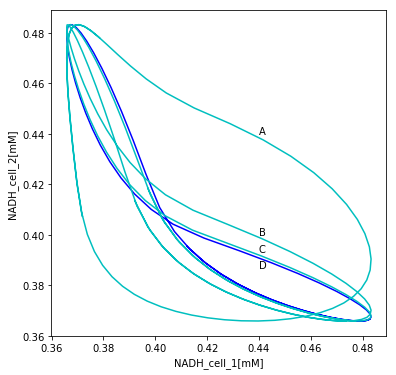

In [75]:
plt.figure(figsize=(6,6))
plt.plot(y_af[:,8][130:],y_bf[:,8][130:],'b')
plt.plot(y_a100[:,8][130:],y_b100[:,8][130:],'c')
plt.plot(y_a1000[:,8][130:],y_b1000[:,8][130:],'c')
plt.plot(y_a2000[:,8][130:],y_b2000[:,8][130:],'c')
plt.xlabel('NADH_cell_1[mM]')
plt.ylabel('NADH_cell_2[mM]')
plt.text(0.44,0.44,'A')
plt.text(0.44,0.40,'B')
plt.text(0.44,0.393,'C')
plt.text(0.44,0.387,'D')
plt.show()

In [11]:
#Modeling adding NADH and changing activity of ADH: stronger ADH
def f(a):
    n=4
    return (1/(1+a**n))
def g(b):
    return (1/(1+b**2))
def Glys3(y, t, params): 
    J0, k1,k2,k_g1,k_g2,k_p1,k_p2,k4,k5,k6,k7,k8,k9,kappa,phi,A,N= params 
    S1,S2,S3,S4,S5,S6,S6_ex,A3,N2= y 
    dydt= np.empty(len(y)) 
    v1= k1*S1*A3*f(A3)
    v2= k2*S2
    v3= (k_g1*k_p1*S3*(N-N2)*(A-A3)-k_g2*k_p2*S4*A3*N2)/(k_g2*N2+k_p1*(A-A3))
    v4= k4*S4*(A-A3)
    v5= k5*S5
    v6= k6*S6*N2
    v7= k7*A3
    v8= k8*S3*N2
    v9= k9*S6_ex
    dydt[0]= J0-v1
    dydt[1]= v1-v2
    dydt[2]= 2*v2-v3-v8
    dydt[3]= v3-v4
    dydt[4]= v4-v5
    dydt[5]= v5-v6-kappa*(S6-S6_ex)
    dydt[6]= phi*kappa*(S6-S6_ex)-v9
    dydt[7]= -2*v1+v3+v4-v7
    dydt[8]= v3 -v6 -v8 #k10 is the constant influx of NADH
    return dydt 
def solveGlys3(S1,S2,S3,S4,S5,S6,S6_ex,A3,N2,k9,k6,t2,rounds): #t2< 3.2
    t1= np.linspace(0,t2,rounds) #cannot run any longer. otherwise the program will collapse

    yi= np.array([S1,S2,S3,S4,S5,S6,S6_ex,A3,N2]) 

    params= np.array([50,550,9.8,323.8,57823.1,76411.1,23.7,80,9.7,k6,28,85.7,k9,375,0.1,4,1]) 

    y1= odeint(Glys3, yi, t1, args= (params,))
    return y1

In [86]:
def sync3(repetition): #different cell types: additional NADH or stronger ADH
    i=0
    while i < repetition:
        if i ==0:
            init1=[1.25935798,  5.10558782,  0.48038965,  0.51430139,  8.22906073,
         0.0753922 ,  0.02451654,  1.51470225,  0.40472535,80,4000,0.1,10]
            init2=[0.47763817,  5.55397456,  0.61144304,  0.50433038,  8.51400742,
         0.06969864,  0.02200483,  2.11841178,  0.46287176,80,1,0.1,10]
        else:
            init1=[inter1[0],inter1[1],inter1[2],inter1[3],inter1[4],inter1[5],(inter1[6]+inter2[6])/2,inter1[7],inter1[8],80,4000,0.05,25]
            init2=[inter2[0],inter2[1],inter2[2],inter2[3],inter2[4],inter2[5],(inter1[6]+inter2[6])/2,inter2[7],inter2[8],80,1,0.05,25]
        c1= solveGlys3(init1[0],init1[1],init1[2],init1[3],init1[4],init1[5],init1[6],init1[7],init1[8],init1[9],init1[10],init1[11],init1[12])
        c2= solveGlys2(init2[0],init2[1],init2[2],init2[3],init2[4],init2[5],init2[6],init2[7],init2[8],init2[9],init2[10],init2[11],init2[12])
        inter1= c1[-1]
        inter2= c2[-1]
        i+=1
    c1= solveGlys3(init1[0],init1[1],init1[2],init1[3],init1[4],init1[5],init1[6],init1[7],init1[8],init1[9],init1[10],0.5,200)
    c2= solveGlys2(init2[0],init2[1],init2[2],init2[3],init2[4],init2[5],init2[6],init2[7],init2[8],init2[9],init2[10],0.5,200)
    return (c1,c2)

In [87]:
s_a,s_b=sync3(100)

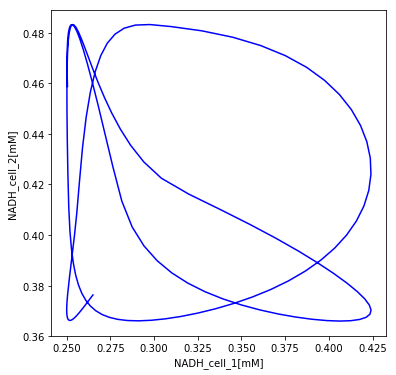

In [88]:
plt.figure(figsize=(6,6))
plt.xlabel('NADH_cell_1[mM]')
plt.ylabel('NADH_cell_2[mM]')
plt.plot(s_a[:,8][50:],s_b[:,8][50:],'b')
plt.show()

In [52]:
def sync4(repetition): #different ADH strength
    i=0
    while i < repetition:
        if i ==0:
            init1=[1.25935798,  5.10558782,  0.48038965,  0.51430139,  8.22906073,
         0.0753922 ,  0.02451654,  1.51470225,  0.40472535,80,4000,0.1,10]
            init2=[0.47763817,  5.55397456,  0.61144304,  0.50433038,  8.51400742,
         0.06969864,  0.02200483,  2.11841178,  0.46287176,80,2000,0.1,10]
        else:
            init1=[inter1[0],inter1[1],inter1[2],inter1[3],inter1[4],inter1[5],(inter1[6]+inter2[6])/2,inter1[7],inter1[8],80,4000,0.05,25]
            init2=[inter2[0],inter2[1],inter2[2],inter2[3],inter2[4],inter2[5],(inter1[6]+inter2[6])/2,inter2[7],inter2[8],80,2000,0.05,25]
        c1= solveGlys3(init1[0],init1[1],init1[2],init1[3],init1[4],init1[5],init1[6],init1[7],init1[8],init1[9],init1[10],init1[11],init1[12])
        c2= solveGlys3(init2[0],init2[1],init2[2],init2[3],init2[4],init2[5],init2[6],init2[7],init2[8],init2[9],init2[10],init2[11],init2[12])
        inter1= c1[-1]
        inter2= c2[-1]
        i+=1
    c1= solveGlys3(init1[0],init1[1],init1[2],init1[3],init1[4],init1[5],init1[6],init1[7],init1[8],init1[9],init1[10],0.5,200)
    c2= solveGlys3(init2[0],init2[1],init2[2],init2[3],init2[4],init2[5],init2[6],init2[7],init2[8],init2[9],init2[10],0.5,200)
    return (c1,c2)

In [77]:
yc_a,yc_b=sync4(100)

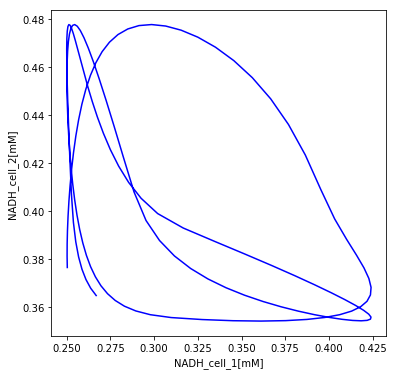

In [78]:
plt.figure(figsize=(6,6))
plt.xlabel('NADH_cell_1[mM]')
plt.ylabel('NADH_cell_2[mM]')
plt.plot(yc_a[:,8][50:],yc_b[:,8][50:],'b')
plt.show()

In [118]:
#manipulate both ADH and NADH
def f(a):
    n=4
    return (1/(1+a**n))
def g(b):
    return (1/(1+b**2))
def Gly4(y, t, params): 
    J0, k1,k2,k_g1,k_g2,k_p1,k_p2,k4,k5,k6,k7,k8,k9,kappa,phi,A,N,k10= params 
    S1,S2,S3,S4,S5,S6,S6_ex,A3,N2= y 
    dydt= np.empty(len(y)) 
    v1= k1*S1*A3*f(A3)
    v2= k2*S2
    v3= (k_g1*k_p1*S3*(N-N2)*(A-A3)-k_g2*k_p2*S4*A3*N2)/(k_g2*N2+k_p1*(A-A3))
    v4= k4*S4*(A-A3)
    v5= k5*S5
    v6= k6*S6*N2
    v7= k7*A3
    v8= k8*S3*N2
    v9= k9*S6_ex
    dydt[0]= J0-v1
    dydt[1]= v1-v2
    dydt[2]= 2*v2-v3-v8
    dydt[3]= v3-v4
    dydt[4]= v4-v5
    dydt[5]= v5-v6-kappa*(S6-S6_ex)
    dydt[6]= phi*kappa*(S6-S6_ex)-v9
    dydt[7]= -2*v1+v3+v4-v7
    dydt[8]= v3 -v6 -v8 +k10 #k10 is the constant influx of NADH
    return dydt 
def solveGly4(S1,S2,S3,S4,S5,S6,S6_ex,A3,N2,k9,k_6,k10,t2): #t2< 3.2
    t1= np.linspace(0,t2,200) #cannot run any longer. otherwise the program will collapse

    yi= np.array([S1,S2,S3,S4,S5,S6,S6_ex,A3,N2]) 

    params= np.array([50,550,9.8,323.8,57823.1,76411.1,23.7,80,9.7,k_6,28,85.7,k9,375,0.1,4,1,k10]) 

    y1= odeint(Gly2, yi, t1, args= (params,))
    return y1

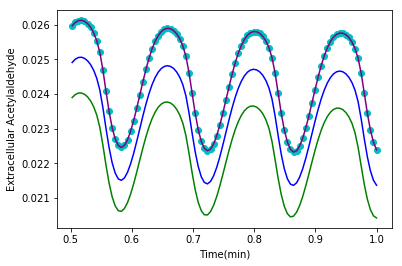

In [136]:
x=np.linspace(0,1,200)
plt.figure()
plt.plot(x[100:],solveGly(2,2,6,1,9,1,1,1,0.3,80,1)[:,6][100:],'co')
plt.plot(x[100:],solveGly4(2,2,6,1,9,1,1,1,0.3,80,2000,0,1)[:,6][100:],'purple')
plt.plot(x[100:],solveGly4(2,2,6,1,9,1,1,1,0.3,80,2100,1,1)[:,6][100:],'b')
plt.plot(x[100:],solveGly4(2,2,6,1,9,1,1,1,0.3,80,2200,2,1)[:,6][100:],'g')
plt.xlabel('Time(min)')
plt.ylabel('Extracellular Acetylaldehyde')
plt.show()

In [139]:
k6=np.linspace(2000,4000,20)
k10=np.linspace(0,6,20)
acetyl=[]
for i in list(range(20)):
    for j in list(range(20)):
        acetyl+=[np.mean(solveGly4(2,2,6,1,9,1,1,1,0.3,80,k6[i],k10[j],1)[:,6][100:])]

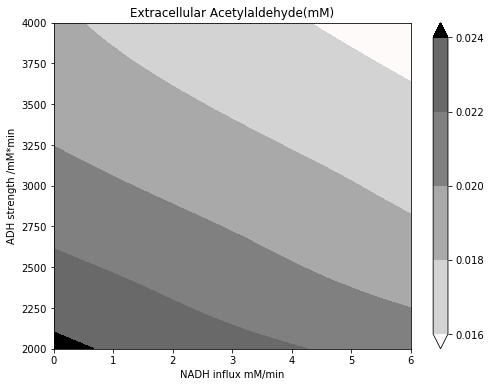

In [171]:
acetyl=np.array(acetyl).reshape(20,20)
k6=np.linspace(2000,4000,20)
k10=np.linspace(0,6,20)
plt.figure(figsize=(8,6))
cs = plt.contourf(k10,k6,acetyl,levels=[0.016,0.018,0.020,0.022,0.024], colors=['lightgrey','darkgray','grey','dimgray'],extend='both')
cs.cmap.set_over('k')
cs.cmap.set_under('snow')
plt.xlabel('NADH influx mM/min')
plt.ylabel('ADH strength /mM*min')
plt.title('Extracellular Acetylaldehyde(mM)')
plt.colorbar()
plt.show()